# pandas Basics <hr style="border:2.5px solid #126782"></hr>

Data Analyst: Allainah Mae J. Guia <br> Department: Electrical Engineering

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# DataFrame

In [259]:
# creating dictionary
data = {
    "Name":['Ainah','Mae','Vinsay'],
    "Age":[19,20,22],
    "Sex":['F','F','M']
}
data

{'Name': ['Ainah', 'Mae', 'Vinsay'],
 'Age': [19, 20, 22],
 'Sex': ['F', 'F', 'M']}

In [260]:
# creating DataFrame from Dictionary
df = pd.DataFrame(data)
df

,Name,Age,Sex
0,Ainah,19,F
1,Mae,20,F
2,Vinsay,22,M


In [261]:
df['Age']

0    19
1    20
2    22
Name: Age, dtype: int64

In [262]:
df['Age'].sum()

np.int64(61)

In [263]:
df['Age'].mean()

np.float64(20.333333333333332)

In [264]:
df['Name']

0     Ainah
1       Mae
2    Vinsay
Name: Name, dtype: object

In [265]:
measurements = {
    "Current":[2,3.5,1.8,4.2,2.7],
    "Power":[100,200,90,210,110]
}
measurements

{'Current': [2, 3.5, 1.8, 4.2, 2.7], 'Power': [100, 200, 90, 210, 110]}

In [266]:
device = pd.DataFrame(measurements)
device

,Current,Power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [267]:
device.cov()

,Current,Power
Current,1.023,56.15
Power,56.150,3370.00


In [268]:
device.corr()

,Current,Power
Current,1.000000,0.956306
Power,0.956306,1.000000


In [269]:
device.describe()

,Current,Power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


# Scatter plot

In [270]:
type(m)

numpy.float64

In [271]:
type(x)

pandas.core.series.Series

In [272]:
device['Current']

0    2.0
1    3.5
2    1.8
3    4.2
4    2.7
Name: Current, dtype: float64

In [273]:
device['Power']

0    100
1    200
2     90
3    210
4    110
Name: Power, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

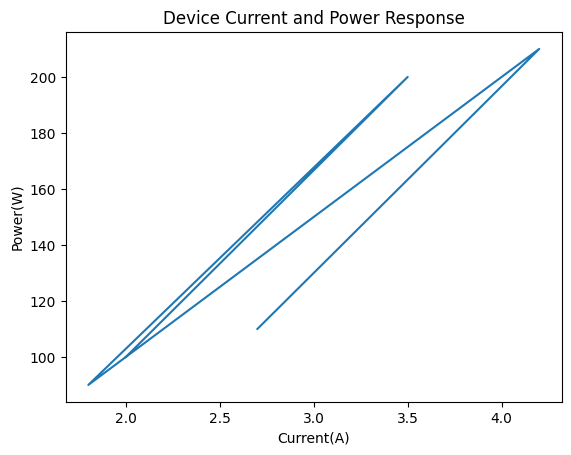

In [274]:
x = device['Current']
y = device['Power']

# regression line

plt.plot(x,y)
plt.title("Device Current and Power Response")
plt.ylabel("Power(W)")
plt.xlabel("Current(A)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

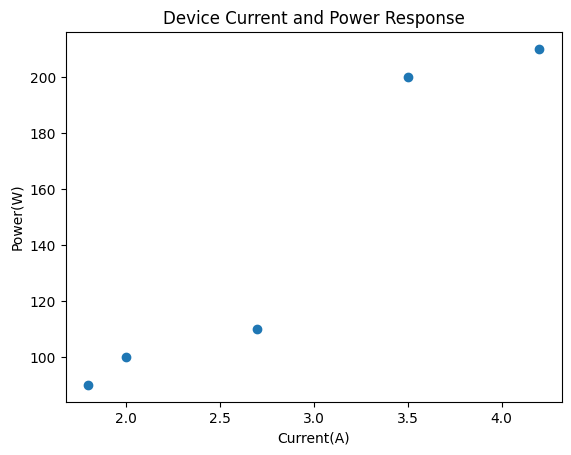

In [275]:
x = device['Current']
y = device['Power']

plt.scatter(x,y)
plt.title("Device Current and Power Response")
plt.ylabel("Power(W)")
plt.xlabel("Current(A)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

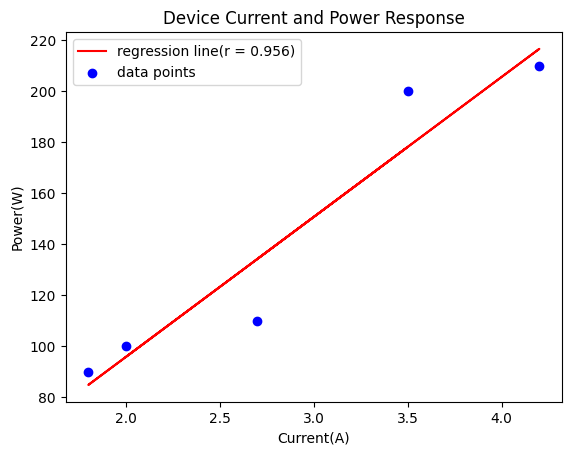

In [276]:
x = device['Current']
y = device['Power']

# regression line
m, b, r, p_value, std_err = stats.linregress(x,y)
line = m*x + b

plt.plot(x,line,
         color='red',
         label=f'regression line(r = {r:.3f})')

# scatter
plt.scatter(x,y,
            color='blue',
            label='data points')
plt.title("Device Current and Power Response")
plt.ylabel("Power(W)")
plt.xlabel("Current(A)")
plt.legend()
plt.show

# Resistance Test

In [277]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [278]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [279]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [280]:
pan_mean = resistance['Panther'].mean()
pan_mean

np.float64(10.75)

In [281]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)
resistance['Panther']

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [282]:
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


# Bar Graph

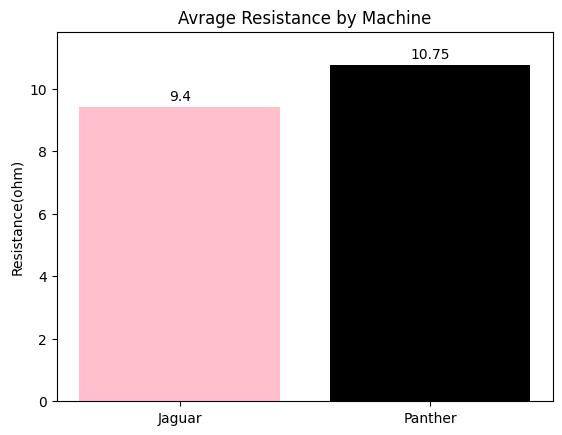

In [291]:
bars = plt.bar(['Jaguar','Panther'],[jag_mean,pan_mean],
               color=['pink','k'])
plt.title('Avrage Resistance by Machine')
plt. ylabel('Resistance(ohm)')

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) #10%

plt.show()